In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

In [36]:
from src.settings import *

## Experiment 1

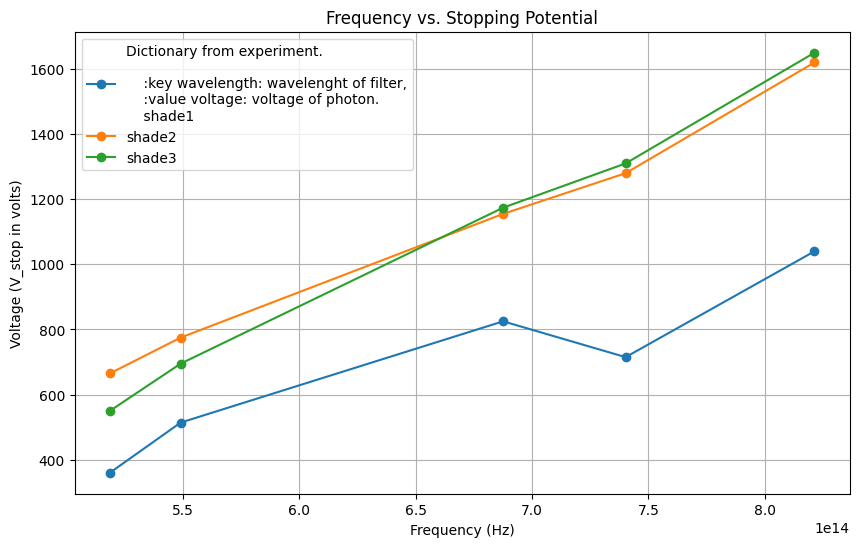

(2.8338579324359807e-12, -924.7345260800902, 17689500.20247179)

In [37]:
LIGHT_SPEED = scipy.constants.speed_of_light

frequencies = {}
for shade, data in PHOTON_VOLTAGE.items():
    frequencies[shade] = {wavelength: LIGHT_SPEED / (wavelength * 1e-9) for wavelength in data.keys()}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for shade, voltages in PHOTON_VOLTAGE.items():
    freq = [frequencies[shade][wl] for wl in voltages.keys()]
    volts = list(voltages.values())
    ax.plot(freq, volts, 'o-', label=shade)

ax.set_title('Frequency vs. Stopping Potential')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Voltage (V_stop in volts)')
ax.legend()
ax.grid(True)

plt.show()

# Prepare data for linear fit
x_data = np.array([frequencies[shade][wl] for shade in PHOTON_VOLTAGE for wl in PHOTON_VOLTAGE[shade]])
y_data = np.array([PHOTON_VOLTAGE[shade][wl] for shade in PHOTON_VOLTAGE for wl in PHOTON_VOLTAGE[shade]])

# Linear fit
slope, intercept = np.polyfit(x_data, y_data, 1)
estimated_h = slope / 1.602e-19  # Slope divided by electron charge

slope, intercept, estimated_h

## Experiment 2

In [48]:
data = pd.read_csv('src/data/experiment.csv')
U_2 = data['InputU2']
I = data['VoltageUA']

In [49]:
def poly2(x, a, b, c):
    popt, _ = sp.optimize.curve_fit(poly2, U_2, I)
    return a * x**2 + b * x + c

In [50]:
print("Coords of local maximum:")
max_idx = argrelextrema(np.array(I), np.greater)[0]
local_maxima = [(U_2[i], I[i]) for i in max_idx]
for coord in local_maxima:
    print(coord)

Coords of local maximum:
(2.29, 1.56)
(8.86, 1.79)
(13.27, 3.11)
(18.05, 4.65)
(23.5, 6.65)
(24.5, 2.96)
(27.9, 7.05)


In [51]:
print("Coords of local minimum:")
min_idx = argrelextrema(np.array(I), np.less)[0]
local_minima = [(U_2[i], I[i]) for i in min_idx]
for coord in local_minima:
    print(coord)

Coords of local minimum:
(6.04, 0.381)
(15.27, 0.64)
(20.4, 0.74)
(24.1, 2.48)
(25.5, 1.28)


Text(0.5, 1.0, 'Závislosť prúdu na napätí s kvadratickým fitom')

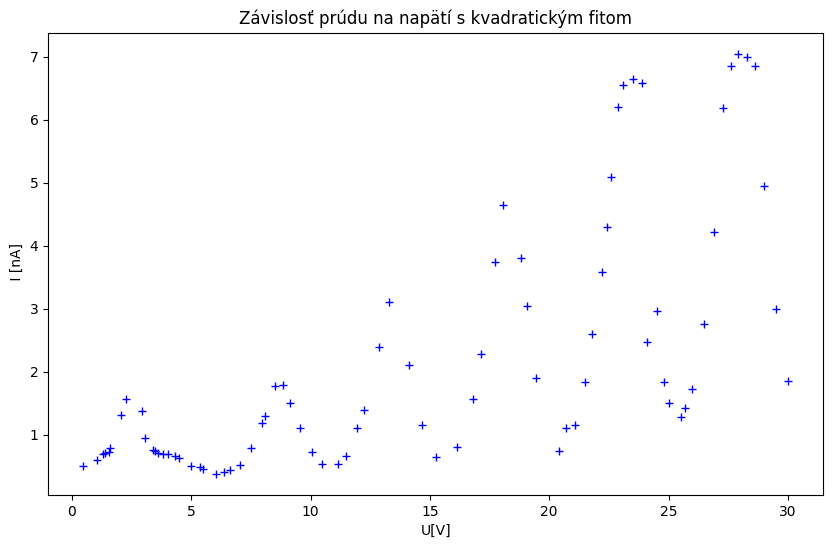

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(U_2, I, 'b+', label='Nametené hodnoty')
plt.xlabel('U[V]')
plt.ylabel(' I [nA]')
plt.title('Závislosť prúdu na napätí s kvadratickým fitom')

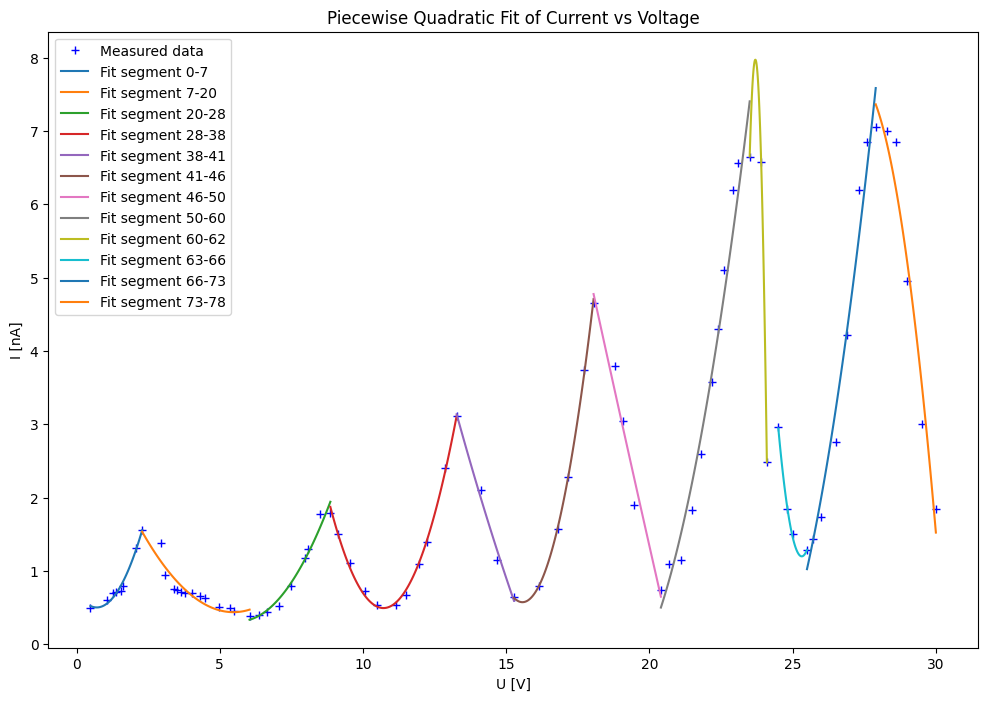

In [54]:
max_indices = argrelextrema(np.array(I), np.greater)[0]
min_indices = argrelextrema(np.array(I), np.less)[0]

# Include the start and end points as well
all_indices = np.sort(np.concatenate(([0], max_indices, min_indices, [len(U_2)-1])))

# Define the quadratic model
def quadratic_model(U_2, a, b, c):
    return a * U_2**2 + b * U_2 + c

# Plot the original data
plt.figure(figsize=(12, 8))
plt.plot(U_2, I, 'b+', label='Measured data')

# Fit and plot a quadratic for each segment
for start, end in zip(all_indices[:-1], all_indices[1:]):
    # Ensure we have at least three data points to fit the model
    if end - start >= 2:  # need at least three points to fit a quadratic
        # Fit
        popt, _ = curve_fit(quadratic_model, U_2[start:end+1], I[start:end+1])

        # Generate U_2 values for plotting
        U_2_fit = np.linspace(U_2[start], U_2[end], 100)

        # Calculate the fitted I values
        I_fit = quadratic_model(U_2_fit, *popt)

        # Plot the segment's fitted curve
        plt.plot(U_2_fit, I_fit, label=f'Fit segment {start}-{end}')

plt.xlabel('U [V]')
plt.ylabel('I [nA]')
plt.title('Piecewise Quadratic Fit of Current vs Voltage')
plt.legend()
plt.show()